In [ ]:
# 2023-06
# Ramsey theory
# probabilistic heuristics for Ramsey numbers
# that don't work very well (but I have better ideas...)

In [48]:
import numpy as np
import scipy as sp
import networkx as nx
from statsmodels.stats import proportion
from matplotlib import pyplot as plt
import pynauty
import datetime
from collections import defaultdict

In [26]:
binom = sp.special.binom

In [21]:
def heur(n, k):
    return (1 - 2/(2**binom(k, 2))) ** binom(n, k)

def numgraphs(n):
    return 2**binom(n, 2)

In [22]:
def bit6(n):
    n -= 63
    bits = bin(n)[2:]
    bits = '0' * (6 - len(bits)) + bits
    return bits

In [23]:
def graph_from_g6(line):
    Bs = [B for B in line.encode() if 63 <= B < 127]
    n = Bs[0] - 63
    assert n < 63
    bit6s = [bit6(B) for B in Bs[1:]]
    allbits = ''.join(bit6s)
    bit_ints = [int(c) for c in list(allbits)]
    
    mat = np.zeros([n, n])
    k = 0
    for j in range(n):
        for i in range(j):
            if bit_ints[k]:
                mat[i, j] = 1
                mat[j, i] = 1
            k += 1
    
    return nx.Graph(mat)

In [24]:
def pynauty_from_nx(G):
    adj_dict = {p[0]: [*p[1]] for p in G.adjacency()}
    return pynauty.Graph(G.number_of_nodes(), adjacency_dict=adj_dict)

def grpsize(G):
    generators, grpsize1, grpsize2, orbits, numorbits = pynauty.autgrp(pynauty_from_nx(G))
    return grpsize1 * 10**grpsize2

In [29]:
proportion.proportion_confint(131, 10**4, method="wilson")

(0.011051026492993674, 0.015522911120371194)

In [73]:
exact3 = defaultdict(lambda: 0)
exact3 |= {2: 2, 3: 6, 4: 18, 5: 12, 6: 0}

In [ ]:
estcount = {}
for n in [2, 3, 4, 5, 6]:
    unramsey = 0
    for _ in range(10**5):
        G = nx.gnp_random_graph(n, 0.5)
        GC = nx.complement(G)
        if not any(len(c)>=3 for c in nx.find_cliques(G)) and \
            not any(len(c)>=3 for c in nx.find_cliques(GC)):
            unramsey += 1
    estcount[n] = unramsey

In [36]:
estcount

{2: 1000000, 3: 749528, 4: 280817}

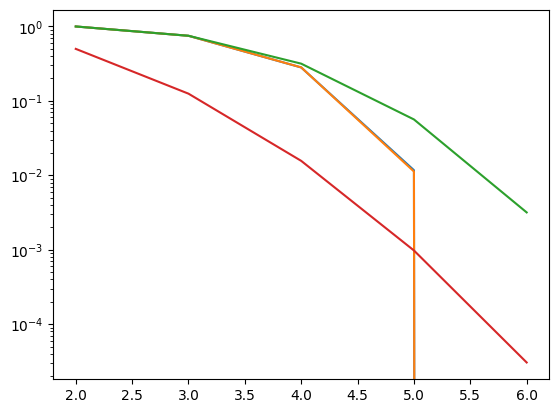

In [73]:
ns = [2, 3, 4, 5, 6]
exact_s = [exact[n] for n in ns]
est_s = [estcount[n]/10**5 for n in ns]
heur_s = [heur(n, 3) for n in ns]
num_s = [1/numgraphs(n) for n in ns]
plt.semilogy(ns, exact_s)
plt.semilogy(ns, est_s)
plt.semilogy(ns, heur_s)
plt.semilogy(ns, num_s)
plt.show()

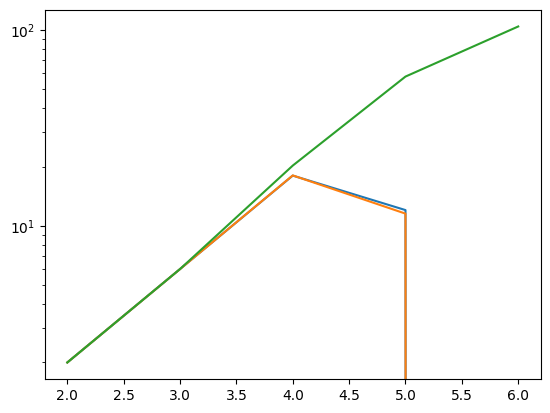

In [74]:
ns = [2, 3, 4, 5, 6]
exact_s = [exact[n] * numgraphs(n) for n in ns]
est_s = [estcount[n]/10**5 * numgraphs(n)  for n in ns]
heur_s = [heur(n, 3) * numgraphs(n) for n in ns]
plt.semilogy(ns, exact_s)
plt.semilogy(ns, est_s)
plt.semilogy(ns, heur_s)
plt.show()

In [43]:
estcount4 = {}
k = 4
for n in range(3, 19):
    unramsey = 0
    for _ in range(10**6):
        G = nx.gnp_random_graph(n, 0.5)
        GC = nx.complement(G)
        if not any(len(c) >= k for c in nx.find_cliques(G)) and \
            not any(len(c) >= k for c in nx.find_cliques(GC)):
            unramsey += 1
    estcount4[n] = unramsey
    print(n, unramsey/10**6, heur(n, k))

3 1.0 1.0
4 0.96864 0.96875
5 0.871237 0.8532151877880096
6 0.686462 0.6211203132202037
7 0.439435 0.32916226569320456
8 0.207251 0.10834779715628379
9 0.062276 0.01830948609419098
10 0.009786 0.0012719213521304833
11 0.000582 2.8175142403203755e-05
12 1.1e-05 1.495543947637841e-07
13 0.0 1.3847666407576999e-10
14 0.0 1.577346948261052e-14
15 0.0 1.5100512150219814e-19
16 0.0 8.041225406404939e-26
17 0.0 1.5271543170502582e-33
18 0.0 6.424650009887096e-43


In [58]:
for n in range(18, 23):
    estcount4[n] = 0

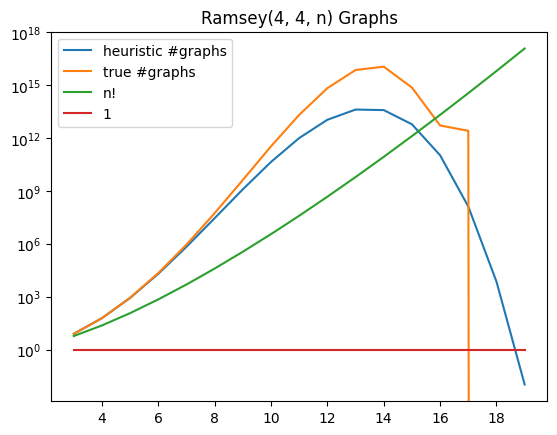

In [92]:
k = 4
ns = [*range(3, 20)]
exact_s = [exact4[n] if exact4[n] else estcount4[n]/10**6 * numgraphs(n) for n in ns]
fac_s = [np.math.factorial(n) for n in ns]
one = [1 for n in ns]
heur_s = [heur(n, k) * numgraphs(n) for n in ns]
plt.semilogy(ns, heur_s, label = "heuristic #graphs")
plt.semilogy(ns, exact_s, label = "true #graphs")
plt.semilogy(ns, fac_s, label = "n!")
plt.semilogy(ns, one, label = "1")
plt.title("Ramsey(4, 4, n) Graphs")
plt.legend()
plt.show()

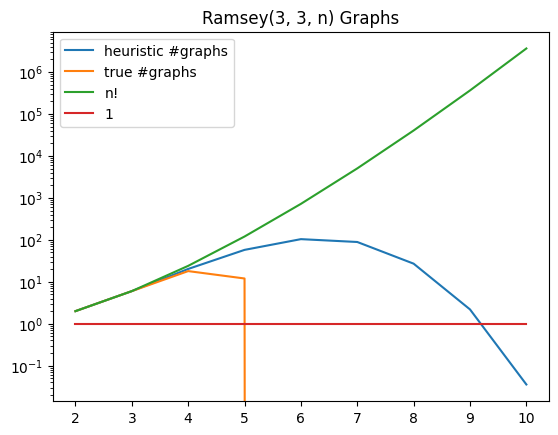

In [91]:
k = 3

ns = [*range(2, 11)]
exact_s = [exact3[n] for n in ns]
fac_s = [np.math.factorial(n) for n in ns]
one = [1 for n in ns]
heur_s = [heur(n, k) * numgraphs(n) for n in ns]
plt.semilogy(ns, heur_s, label = "heuristic #graphs")
plt.semilogy(ns, exact_s, label = "true #graphs")
plt.semilogy(ns, fac_s, label = "n!")
plt.semilogy(ns, one, label = "1")
plt.title("Ramsey(3, 3, n) Graphs")
plt.legend()
plt.show()

In [49]:
exact4 = defaultdict(lambda: 0)
for n in tots:
    exact4[n] = tots[n]

In [31]:
tots = {}

for n in range(11, 18):
    start = datetime.datetime.now()
    tots[n] = 0
    
    r44_n = nx.graph6.read_graph6(f'r44_{n}.g6')
    print(n, len(r44_n), datetime.datetime.now() - start, flush=True)
    start = datetime.datetime.now()
    
    for G in r44_n:
        tots[n] += int(np.math.factorial(n) / grpsize(G))

    print(n, tots[n], datetime.datetime.now() - start, flush=True)

11 546356 0:00:30.399981
11 20992955608800 0:00:11.567102
12 1449166 0:02:00.438897
12 684374112797760 0:02:07.507463
13 1184231 0:23:23.029259
13 7318319228035200 0:00:57.842170
14 130816 0:00:52.788767
14 11300915661235200 0:00:02.776208
15 640 0:00:00.516875
15 740252665152000 0:00:00.019862
16 2 0:00:00.003647
16 5230697472000 0:00:00.000240
17 17 0:00:00.000880


AttributeError: 'int' object has no attribute 'adjacency'

In [35]:
for n in [17]:
    start = datetime.datetime.now()
    tots[n] = 0
    
    r44_n = nx.graph6.read_graph6(f'r44_{n}.g6')
    print(n, len(r44_n), datetime.datetime.now() - start, flush=True)
    start = datetime.datetime.now()
    
    G = r44_n
    
    tots[n] += int(np.math.factorial(n) / grpsize(G))

    print(n, tots[n], datetime.datetime.now() - start, flush=True)

17 17 0:00:00.000780
17 2615348736000 0:00:00.000627


In [82]:
start = datetime.datetime.now()

r55_42some = nx.graph6.read_graph6(f'r55_42some.g6')
print(len(r55_42some), datetime.datetime.now() - start, flush=True)
start = datetime.datetime.now()

tots55 = 0

grps = []

for G in r55_42some:
    grp = grpsize(G)
    grps.append(grp)
    tots55 += int(np.math.factorial(n) / grp)

print(tots55, datetime.datetime.now() - start, flush=True)

328 0:00:00.165797
303480196499954073600000 0:00:00.043662


(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

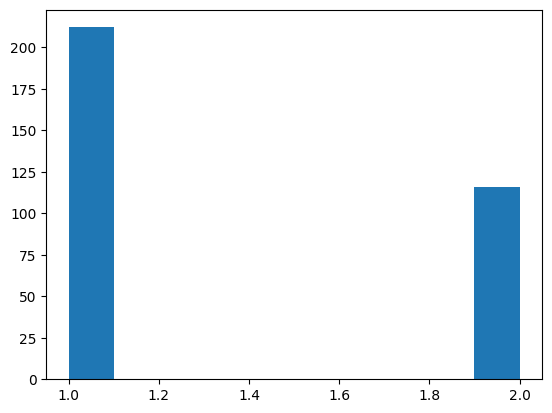

In [85]:
plt.hist(grps)

In [80]:
303480196499954073600000*2.

6.069603929999082e+23

In [87]:
grpsize(r44_n)

136.0

In [88]:
np.log(np.math.factorial(17))

33.50507345013689